# **How to handle imbalanced datasets**

Chanin Nantasenamat

[*Coding Professor YouTube channel*](https://www.youtube.com/channel/UCJzlfIoF8nmWqJIv_iWQVRw)

[*Data Professor YouTube channel*](http://youtube.com/dataprofessor)

<a href="https://imbalanced-learn.org"><img width="150" src="https://imbalanced-learn.org/stable/_static/logo.png"></a>

---

🔴 **Support my work:**
[![Buy me a coffee](https://img.shields.io/badge/Buy%20me%20a%20coffee--yellow.svg?logo=buy-me-a-coffee&logoColor=orange&style=social)](https://www.buymeacoffee.com/dataprofessor)

🟠 **Learn Data Science for FREE:**
[![YouTube](https://img.shields.io/youtube/channel/subscribers/UCV8e2g4IWQqK71bbzGDEI4Q?style=social)](http://youtube.com/dataprofessor)
[![Medium](https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white&style=social)](https://medium.com/@chanin.nantasenamat)
[![GitHub](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&style=social&logo=github&logoColor=white)](https://github.com/dataprofessor/)
[![Newsletter](https://img.shields.io/badge/Newsletter-3A8EED?style=for-the-badge&style=social&logoColor=white)](http://newsletter.dataprofessor.org/)
[![DataProfessor](https://img.shields.io/badge/Data-Professor-3A8EED?style=for-the-badge&style=social&logoColor=white)](http://dataprofessor.org/)

🟢 **Learn Python and R for FREE:**
[![Python](https://img.shields.io/badge/Python-3776AB?style=for-the-badge&style=social&logo=python&logoColor=white)](https://www.youtube.com/playlist?list=PL2WsO1N8GK8vMMPQaux9PZaAXBGV7absc)
[![R](https://img.shields.io/badge/R-276DC3?style=for-the-badge&style=social&logo=r&logoColor=white)](https://www.youtube.com/playlist?list=PL2WsO1N8GK8v9xaNwbR1tiGH9lO4epcjg)

🔵 **Connect with me:**
[![Follow](https://img.shields.io/twitter/follow/thedataprof?style=social)](https://www.twitter.com/thedataprof)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&style=social&logo=linkedin&logoColor=white)](https://www.linkedin.com/company/dataprofessor/)
[![Facebook](https://img.shields.io/badge/Facebook-1877F2?style=for-the-badge&style=social&logo=facebook&logoColor=white)](http://facebook.com/dataprofessor/)
[![Instagram](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&style=social&logo=instagram&logoColor=white)](https://www.instagram.com/data.professor/)


### **Install imbalanced-learn**

In [ ]:
! pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 7.0MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


### **Read data**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/hcv_classification.csv', index_col=False)

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,inactive


In [ ]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

### **Class distribution**

In [ ]:
y.value_counts()

active      412
inactive    166
Name: Activity, dtype: int64

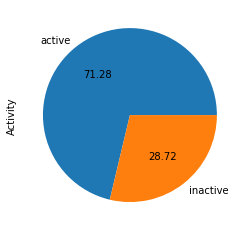

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7fd331d328d0>,
 [Text(-0.6818247054992795, 0.8632004813314349, 'active'),
  Text(0.6818247054992798, -0.8632004813314348, 'inactive')],
 [Text(-0.3719043848177888, 0.4708366261807826, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

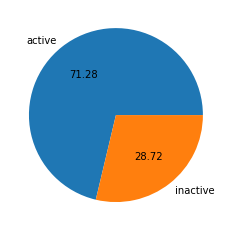

In [ ]:
# Show pie plot (Approach 2)
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=activity_count.index)

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

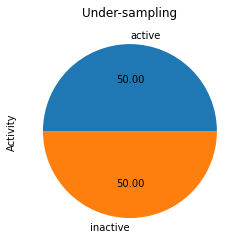

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Class distribution
y_res.value_counts()

active      166
inactive    166
Name: Activity, dtype: int64

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



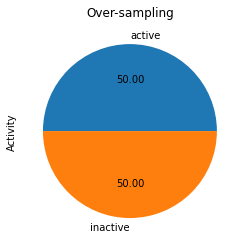

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

active      412
inactive    412
Name: Activity, dtype: int64